# De la clase 10
La solucion particular $X_{tp}$ esta dada por:

$$ X_{tp} = (1- \phi B)^{-1} (c + Z_t) = (1 + \phi B + \phi^2 B^2 + \cdots + \phi^n B^n + \cdots ) ( c  + Z_t)$$.
Lo mismo que en ecuaciones diferenciales la solucion general es la suma de la particular mas la homogenea. $X_t = X_{th} + X_{tp}$.

Resultado preliminar:

$$(1 - \phi B) X_t = (1 - \phi B)( X_{th} + X_{tp}) = \cancel{(1 - \phi B) X_{th}} + (1 - \phi B) X_{tp} = (1 - \phi B) X_{tp} \quad (7) $$

Escribimos 

\begin{eqnarray}
X_t &=& X_{th}  + X_{tp} \\
&=& \phi^t C + c(1 + \phi B + \phi^2 B^2 + \cdots + \phi^n B^n + \cdots ) + 
Z_t + \phi Z_{t-1} + \cdots + \phi^n Z_{t-n} + \cdots \\
&=& C \phi^t + c \sum_{i=0}^\infty \phi^i + \sum_{i=0}^\infty \phi^i Z_{t-i} 
\end{eqnarray}

Si aplicamos las condiciones iniciales $X_t=X_0$, $t=0$,
entonces $C=X_0$.  **ERROR**

Si $t=0$


$$ X_0 = C  + c \sum_{i=0}^\infty \phi^i + Z_0 $$
como $X_0 = Z_0$

$$ Z_0 = C  + c \sum_{i=0}^\infty \phi^i  + Z_0 $$

De forma que 

$$  C  + c \sum_{i=0}^\infty \phi^i  = 0$$
es decir

$$ C = - c \sum_{i=0}^\infty \phi^i .$$

y

$$ X_t =  -c \phi^t \sum_{i=0}^\infty \phi^i  + c \sum_{i=0}^\infty \phi^i + \sum_{i=0}^\infty \phi^i Z_{t-i}  .$$

En las derivaciones anteriores hemos asumido que $c=0$, y asi obtenmos:

$$ X_t =  \sum_{i=0}^\infty \phi^i Z_{t-i}  \quad (0).$$


De la ecuacion AR(1)

$$ X_t = \phi X_{t-1} + Z_0$$, para la incogina $X_t$
obtuvimos la solucion $X_t$ de cuatro formas diferentes:

1. Usando back-substitution
2. Usando forward-substitution (tarea)
3. Usando el back-shift $B$ operator
4. Usando el metodo de ecuaciones con diferencias. 

Nota: Esto solo lo hacemos con AR(1) por que es mucho trabajo para las demas. En el caso de las demas usanmos las ecuaciones en diferencias.

Recuerde que la ecuacion AR(1) es:


$$ X_t = \phi X_{t-1} + Z_0  \quad (1)$$.  $c=0$

Hasta este punto nuestra incogina es $X_t$, pero ahora pensememos
que la incoginta es $\phi$. Como podemos hallar $\phi$?


Resolvemos la ecuacion AR(1) para $\phi$ en terminos de los datos.
Aca los datos van a ser la ACF. Si tienen los $X_t$ se puede estimar
la ACF y con esta $\phi$. Al metodo para esto se la llama **Yule-Walker**
en honor a Udny Yule y Gilber Walker (ver wikipedia).

Veamos. Multiplicamos ambos lados, a derecha, de la ecuacion (1) por $X_{t+1}$ y obtenemos

y como $X_{t+1}= \phi X_t + Z_{t+1}$


\begin{eqnarray}
X_t X_{t+1} &=&  X_{t} (\hat{\phi} X_t + Z_{t+1}) \\
&=& \hat{\phi} X_t X_t + X_t Z_{t+1}. 
\end{eqnarray}
Usamos $\hat{\phi}$ para decir que estamos **estimando** $\phi$.
Tomemos la esperanza de esta expresion

\begin{eqnarray}
\gamma_1 &=& \mathbb{E}[ X_t X_{t-1}] =\mathbb{E}[ X_t (\hat{\phi} X_t + Z_{t+1})]  \\
&=& \hat{\phi} \mathbb{E}[X_t X_t] + \cancel{\mathbb{E}[X_t Z_{t+1}]}  \\
&=& \hat{\phi} \mathbb{E}[X_t X_t] = \hat{\phi} \sigma^2 = \hat{\phi} \rho_0
\end{eqnarray}

Dividiendo por $\sigma^2$ obtenemos

$$ \rho_1 = \hat{\phi} \rho_0 $$

Despejemos $\hat{\phi}$,

$$ \hat{\phi} =  \frac{\rho_1}{\rho_0} $$
Esta es la solucion.  En resumen:
Si se tiene un modelo autoregrivo AR(1),  donde se conocen los datos $X_t$, de estos se puede calcular la funcion de auctorrelacion ACF y
de alli el coeficiente $\phi$ (estimado $\hat{\phi}$). 

Con esto terminamos el modelo AR(1). Vamos a la parte practica.
Asumamos inicialmente $\phi=0.3$ y que tenemos el modelo AR(1)

$$ X_t = 0.3 X_{t-1} + Z_t$$
donde $Z_t$ es ruido blanco con media 0 y varianza $\sigma_Z^2=1$



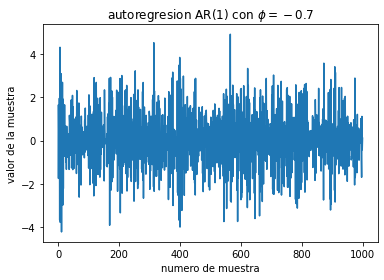

In [25]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1) #esto garantiza que siempre se genera el mismo ruido
mu, sigma=0,1
N=1000
Z = np.random.normal(mu, sigma, N)

phi=-0.7
X=np.zeros(N)
X[0] = Z[0]

for t in range(1,N):
    X[t] = Z[t] + phi*X[t-1]  # ecuacion (1)


# grafiquemos
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("autoregresion AR(1) con $\phi=-0.7$")
plt.plot(X)
plt.show()


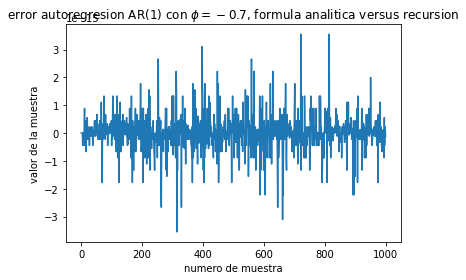

In [26]:
# generemos X[t] usando la formula derivada en clase (0)
np.random.seed(1)
z = np.random.normal(mu, sigma, N)
X2=np.zeros(N)
X2[0]=Z[0]

for t in range(1,N):
    # sume
    X2[t] = sum( (phi**i)*Z[t-i] for i in range(t+1))
# grafiquemos el error

# el termino mil es simplemente
#  X2[1000] = sum( (phi**i)*Z[1000-i] for i in range(1001))


plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("error autoregresion AR(1) con $\phi=-0.7$, formula analitica versus recursion")
plt.plot(X2-X)
plt.show()


Lo que implica que las formulas son correctas.

Comentarios:

* La primera formula (1) es recursiva y mas rapida. Tiene solo un ciclo ```for```.
* La segunda formula (0) no es recursiva per es mas lenta. Tiene 2 ciclos ```for```. 
* Sin embargo, si queremos calcular el termino 1000, en la primera formula tenemos que calcular todos hasta el 999. La segunda se puede evaluar sin conocer los primers 999 terminos.

# Coeficientes de autocorrelacion $\rho_{\tau} = \phi^{\tau}$.
Verifiquemos que esta formula es correcta.

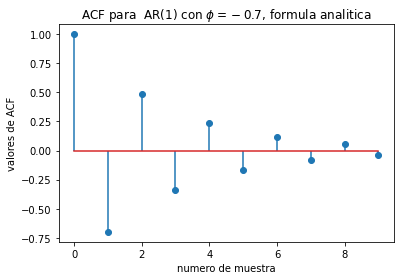

In [27]:
M=10 # solamente calculamos 10 coeficientes
rho = np.zeros(M)
rho = [phi**i for i in range(M)]
plt.xlabel("numero de muestra")
plt.ylabel("valores de ACF")
plt.title("ACF para  AR(1) con $\phi=-0.7$, formula analitica")
plt.stem(rho)
plt.show()


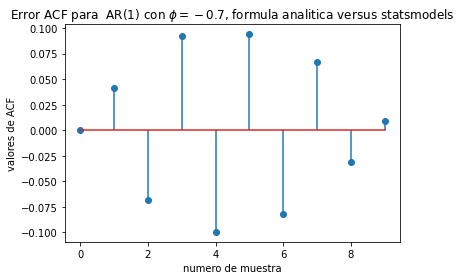

In [28]:
# usemos ahora statmodels
import statsmodels.api as sm  
rho2 = sm.tsa.acf(X)[0:10]
plt.xlabel("numero de muestra")
plt.ylabel("valores de ACF")
plt.title("Error ACF para  AR(1) con $\phi=-0.7$, formula analitica versus statsmodels")
plt.stem(rho-rho2)
plt.show()


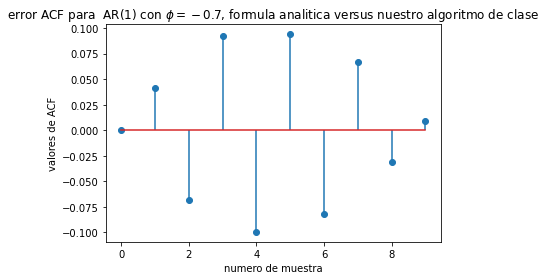

In [29]:
# reprogramemos las herramientas para ACF que desarrollamos en clase
import numpy as np
from numpy import array, dot, mean

# shift
def shift(arr, num, fill_value=0):
    result = np.empty_like(arr)
    if num>0:
        result[:num] = fill_value
        result[num:] = arr[:-num]
    elif num < 0:
        result[num:] = fill_value
        result[:num] = arr[-num:]
    else:
        result[:] = arr

    return result


X = X - mean(X)

gamma = []
for i in range(0, len(X)):
    U = shift(X, i)
    mu = round(mean(U),2)
    Us = U - mu
    gamma.append(dot(X, Us)/(len(X)-1))

myrho = gamma/gamma[0]
myrho2 = myrho[0:M]

plt.xlabel("numero de muestra")
plt.ylabel("valores de ACF")
plt.title("error ACF para  AR(1) con $\phi=-0.7$, formula analitica versus nuestro algoritmo de clase")
plt.stem(rho-myrho2)
plt.show()




Recapitulando hasta este punto
* Generamos las $X_t$ de does formas, recursiva ya analitica. 
* Graficamos el error y da del orden de $10^{-15}$ nos da confianza.
* Calculamos la ACF de tres formas:
    * Analitica $\rho_i =  \phi^i$.
    * Usando ```statsmodels```
    * Usando nuestro propio algoritmo. Hay con consistencia entre los tres. Nuestro algoritmo es compatible con el de ```statsmodels``` con error de entre -2% y 5%.
* Finalmente veamos lo que pasa con el estimado de $\hat{\phi}$. Yule-Walker

In [30]:
phi_1_estimate = rho[1]/rho[0]
print("el estimado de phi es", phi_1_estimate)

el estimado de phi es -0.7


# Modelo AR(2), AR(p), p=2
Este modelo se basa en la ecuacion

$$X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + Z_t $$